## Imports and Setup

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

from datetime import datetime
from ema_workbench import load_results
from ema_workbench.analysis import pairs_plotting

In [2]:
experiment_datetime = "20230613T1437" ## change these 2 lines based on filename you want to read in
experiment_type = "all_generated" ## "fixed_policies" or "generate_all"
results = load_results('./output/' + experiment_datetime + '_results__' + experiment_type)

In [3]:
experiments, outcomes = results

----------------------------------------

In [4]:
experiments

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,97,188.844041,10.0,0.829837,111.293572,1.5,0.922698,64.203863,1.0,0.453342,...,10,7,6,6,10,1,2,10,0,dikesnet
1,37,196.910840,10.0,0.422146,161.293520,1.0,0.537392,313.888384,10.0,0.961697,...,10,7,6,6,10,1,2,11,0,dikesnet
2,96,281.961066,1.5,0.889323,150.176114,10.0,0.310098,195.751178,1.5,0.590504,...,10,7,6,6,10,1,2,12,0,dikesnet
3,30,66.690166,10.0,0.118739,243.712323,10.0,0.665446,129.005420,1.5,0.388764,...,10,7,6,6,10,1,2,13,0,dikesnet
4,108,63.112110,1.5,0.165838,97.334161,1.0,0.112512,42.424293,1.5,0.250975,...,10,7,6,6,10,1,2,14,0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,34,275.986730,10.0,0.434980,72.102078,1.5,0.565638,80.287799,1.5,0.113619,...,4,4,5,1,9,4,1,105,9,dikesnet
996,68,142.683175,10.0,0.272104,271.084430,1.5,0.229389,264.527733,1.0,0.854834,...,4,4,5,1,9,4,1,106,9,dikesnet
997,110,167.283033,1.5,0.570730,294.096673,1.0,0.589592,314.907067,1.5,0.887672,...,4,4,5,1,9,4,1,107,9,dikesnet
998,65,208.535358,1.5,0.502605,253.572090,1.5,0.372711,157.296779,1.5,0.466945,...,4,4,5,1,9,4,1,108,9,dikesnet


In [5]:
# TODO: Make a 5-outcome PF and undo this part
# Drop outcomes which we aren't interested in:
outcomes_of_interest = ['A.4 Expected Annual Damage', 'A.4 Expected Number of Deaths',
                        'Total Infrastructure Costs', 'Total Expected Annual Damage',
                        'Total Expected Number of Deaths']
outcomes = {k:outcomes[k] for k in outcomes_of_interest if k in outcomes}

In [6]:
pd.DataFrame(outcomes)

,A.4 Expected Annual Damage,A.4 Expected Number of Deaths,Total Infrastructure Costs,Total Expected Annual Damage,Total Expected Number of Deaths
0,0.000000e+00,0.000000,2.132122e+09,0.000000e+00,0.000000
1,0.000000e+00,0.000000,2.132122e+09,0.000000e+00,0.000000
2,0.000000e+00,0.000000,2.132122e+09,3.626099e+06,0.000649
3,0.000000e+00,0.000000,2.132122e+09,7.662838e+06,0.000802
4,0.000000e+00,0.000000,2.132122e+09,2.365689e+07,0.004203
...,...,...,...,...,...
995,0.000000e+00,0.000000,1.578712e+09,6.420373e+07,0.043689
996,0.000000e+00,0.000000,1.578712e+09,1.779639e+06,0.000580
997,1.182143e+06,0.000314,1.578712e+09,2.852641e+06,0.001126
998,0.000000e+00,0.000000,1.578712e+09,9.671635e+05,0.000746


---------------------------------------

## Visual Analysis

First, we can look at a pair-plotted scatter plot to visualize how our outcomes are related to each other and how differences in policy influence differences in outcomes. This is especially helpful if we are running analysis using hand-crafted policies or those decided on by the Directed Search proces.

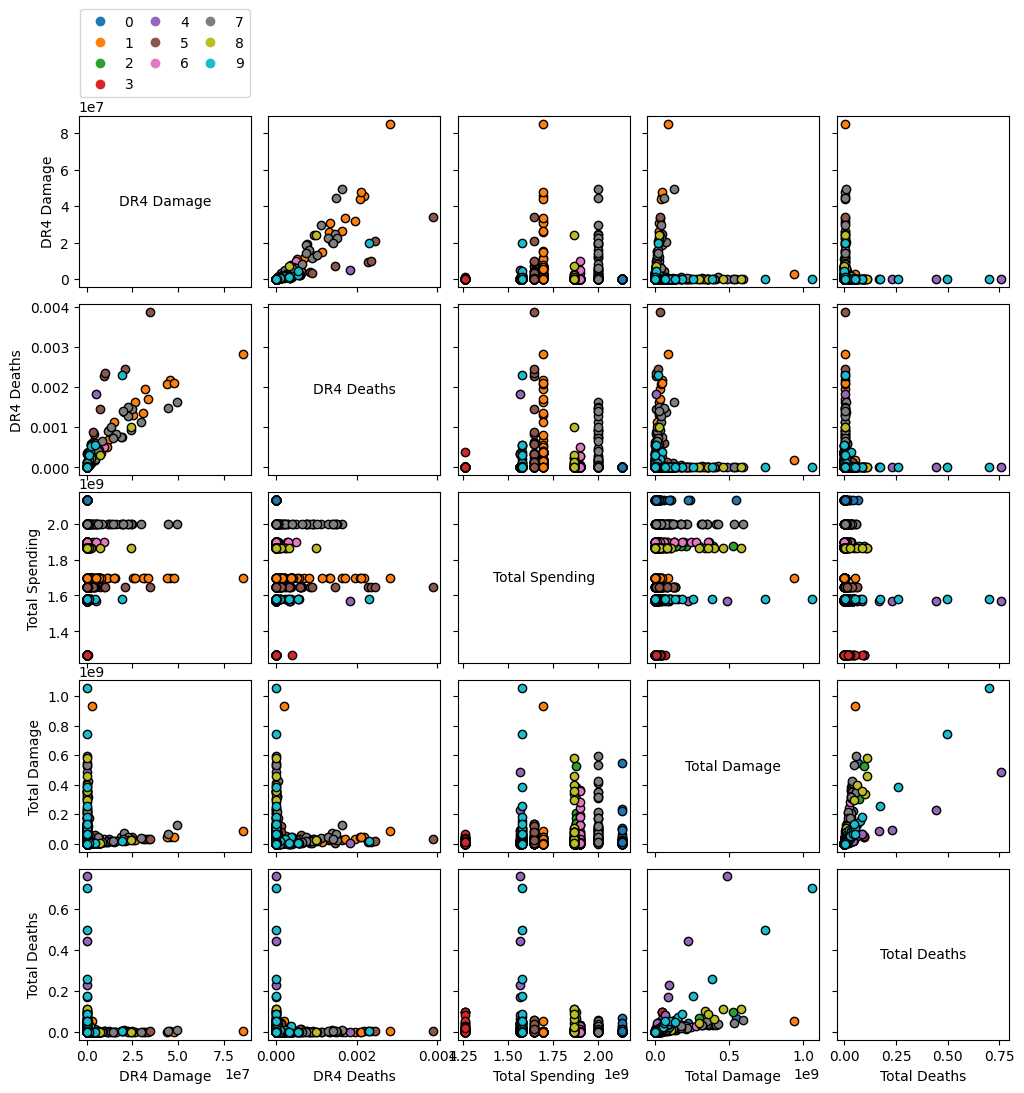

In [12]:
ylabels = {
    'A.4 Expected Annual Damage'        : 'DR4 Damage',
    'A.4 Expected Number of Deaths'     : 'DR4 Deaths',
    'Total Infrastructure Costs'        : 'Total Spending',
    'Total Expected Annual Damage'      : 'Total Damage',
    'Total Expected Number of Deaths'   : 'Total Deaths'
}
fig, axes = pairs_plotting.pairs_scatter(experiments, outcomes, group_by='policy',
                                         grouping_specifiers=range(10),
                                         legend=True, ylabels=ylabels)
fig.set_size_inches(12, 12)
plt.show()

-----------------------------------

## Scenario Discovery

Our goal with 